# Tutorial 2: Introduction to Machine Learning with Python & Scikit-learn using a Regression Problem
<br>
# Predicting Movie Ratings

### Notebook Overview:
   - Objective
   - Import Packages
   - Part I: Data Understanding
       - Data Background
       - Data Exploration
   - Part II: Data Preparation
       - Subset Data
       - Create New Variables
       - Convert Strings to Numeric
       - Missing Data
       - Zero-Variance Removal
       - Highly Correlated Variable Removal
       - Set Target and Predictor Variables
       - Partition Data & Prepare for Modeling
       
   - Part III. Modeling
       - Linear Regression
           - Fit the model
           - Model Evaluation using the Test Data
       - Decision Tree
           - Fit the model
           - Model Evaluation using the Test Data    
   - Part IV: Evaluation

### Objective

Predict the rating of a movie

### Import Packages

In [1]:
# show plots in the notebook
%matplotlib inline

# Packages
import pandas as pd
import numpy as np
import re
from decimal import *
import scipy.stats as stats
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold

# I. Data Understanding

### Data Background

GroupLens Research has collected data from MovieLens, a movie recommendation service. They offer several data sets differing in size. For this tutorial we will be using their "small" dataset, which contains 100k ratings and 1300 tag applications applied to 9000 movies by 700 users. The rating system is based on 5-stars. The zippled folder includes 4 datasets: *links.csv*, *movies.csv*, *ratings.csv*, and *tags.csv* ([Download zipped file](http://files.grouplens.org/datasets/movielens/ml-20m.zip))

Please refer to the ReadMe included in the zipped file for more details. More information about the different datasets is available on the GroupLens site http://grouplens.org/datasets/movielens/

After downloading and extracting the data from the zip file, each csv can be loaded into a `pandas` DataFrame.

In [2]:
# Import csv
links = pd.read_csv('/Users/abeasock/Documents/Data/MovieLens_small/links.csv')
movies = pd.read_csv('/Users/abeasock/Documents/Data/MovieLens_small/movies.csv')
ratings = pd.read_csv('/Users/abeasock/Documents/Data/MovieLens_small/ratings.csv')
tags = pd.read_csv('/Users/abeasock/Documents/Data/MovieLens_small/tags.csv')


# Print out column names
print links.columns
print movies.columns
print ratings.columns
print tags.columns

Index([u'movieId', u'imdbId', u'tmdbId'], dtype='object')
Index([u'movieId', u'title', u'genres'], dtype='object')
Index([u'userId', u'movieId', u'rating', u'timestamp'], dtype='object')
Index([u'userId', u'movieId', u'tag', u'timestamp'], dtype='object')


In [3]:
links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [13]:
tags.head(5)

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [11]:
#join1 = links.join(movies, on='movieId')

join1 = pd.merge(links, movies, how='inner', on='movieId')

join2 = pd.merge(ratings, join1, how='inner', on='movieId')

join2

,userId,movieId,rating,timestamp,imdbId,tmdbId,title,genres
0,1,31,2.5,1260759144,112792,9909.0,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,112792,9909.0,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,112792,9909.0,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,112792,9909.0,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,112792,9909.0,Dangerous Minds (1995),Drama
5,39,31,3.0,832525157,112792,9909.0,Dangerous Minds (1995),Drama
6,73,31,3.5,1255591860,112792,9909.0,Dangerous Minds (1995),Drama
7,88,31,3.0,1239755559,112792,9909.0,Dangerous Minds (1995),Drama
8,96,31,2.5,1223256331,112792,9909.0,Dangerous Minds (1995),Drama
9,110,31,4.0,840100695,112792,9909.0,Dangerous Minds (1995),Drama


### Data Exploration

In [95]:
# Strip whitespace from the 'movie_title' column
movies['movie_title'] = movies['movie_title'].map(str.strip)

print (movies.shape)

# Drop columns that would not help in predicting
movies.drop(['plot_keywords', 'movie_imdb_link', 'aspect_ratio'], 1, inplace=True)

# Number of records originally in the dataset (to be used later)
orig_len = len(movies)

# Datatypes of each column
movies.dtypes

(5043, 28)


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

By printing the shape of the data, we can see it has 5043 rows and 28 columns.

We are trying to predict the score that people are likely to give to a movie. Our target variable is the `imdb_score` column, which is the average of all ratings for a movie. Let's look at the average and plot the distribution of all the scores.


 Average movie IMDB score: 6.44


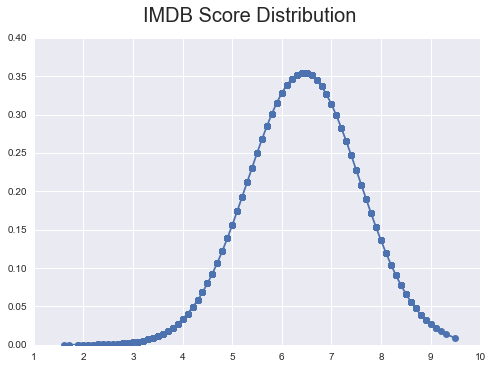

In [4]:
# Average of IMDB scores in the data 
print "\n Average movie IMDB score: " + str(format(np.mean(movies.imdb_score), '.2f'))

# Plot the IMDB scores to visualize distribution
score = movies['imdb_score'].tolist()
score = sorted([float(Decimal("%.2f" % e)) for e in score])
fit = stats.norm.pdf(score, np.mean(score), np.std(score))
fig = plt.figure()
plt.plot(score, fit, '-o')
fig.suptitle('IMDB Score Distribution', fontsize=20)

**Top 10 Movies by IMDB Score**

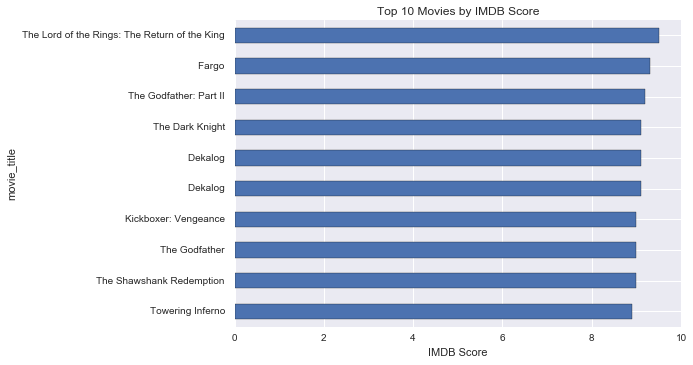

In [5]:
top10scores = movies[['movie_title', 'imdb_score']].sort_values(['imdb_score'], ascending=False).head(10)

top10scores_plot = top10scores.sort_values(['imdb_score']).set_index(top10scores.movie_title).plot.barh(stacked=True, legend=None, title='Top 10 Movies by IMDB Score')
top10scores_plot.set_xlabel("IMDB Score")

The movie "Dekalog" is in there twice and after looking into those two records closer it seems they are duplicates. So let's go ahead and remove any duplicates in the data.

`df.drop_duplicates()` removes duplicate rows, optionally only considering certain columns. In the parameters you can subset by columns, and also tell it which observation to keep (default is 'first'). For example if we wanted to subset on movie_title and keep the last observation, we can do:

`movies.drop_duplicates(['movie_title'], keep='last')`

In [96]:
orig_len = len(movies)

movies.drop_duplicates(inplace=True)

print str(orig_len - len(movies)) + " records were dropped for being duplicates"

45 records were dropped for being duplicates


**Top 10 Most Profitable Movies**

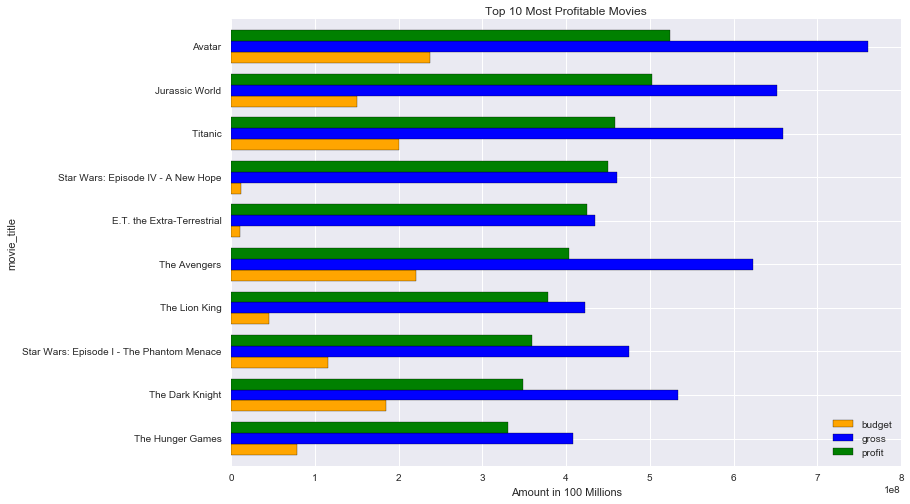

In [7]:
# Calculate profit as gross minus budget
movies['profit'] = movies['gross'] - movies['budget']

top10profit = movies[['movie_title', 'budget', 'gross', 'profit']].sort_values(['profit'], ascending=False).head(10)

top10profit_plot = top10profit.groupby(top10profit.movie_title).sum().sort_values(['profit']).plot.barh(figsize=(12,8), title='Top 10 Most Profitable Movies', color=['orange', 'blue', 'green'], width=0.75)
top10profit_plot.set_xlabel("Amount in 100 Millions")

# Drop 'profit' column
movies.drop('profit', axis=1, inplace=True)

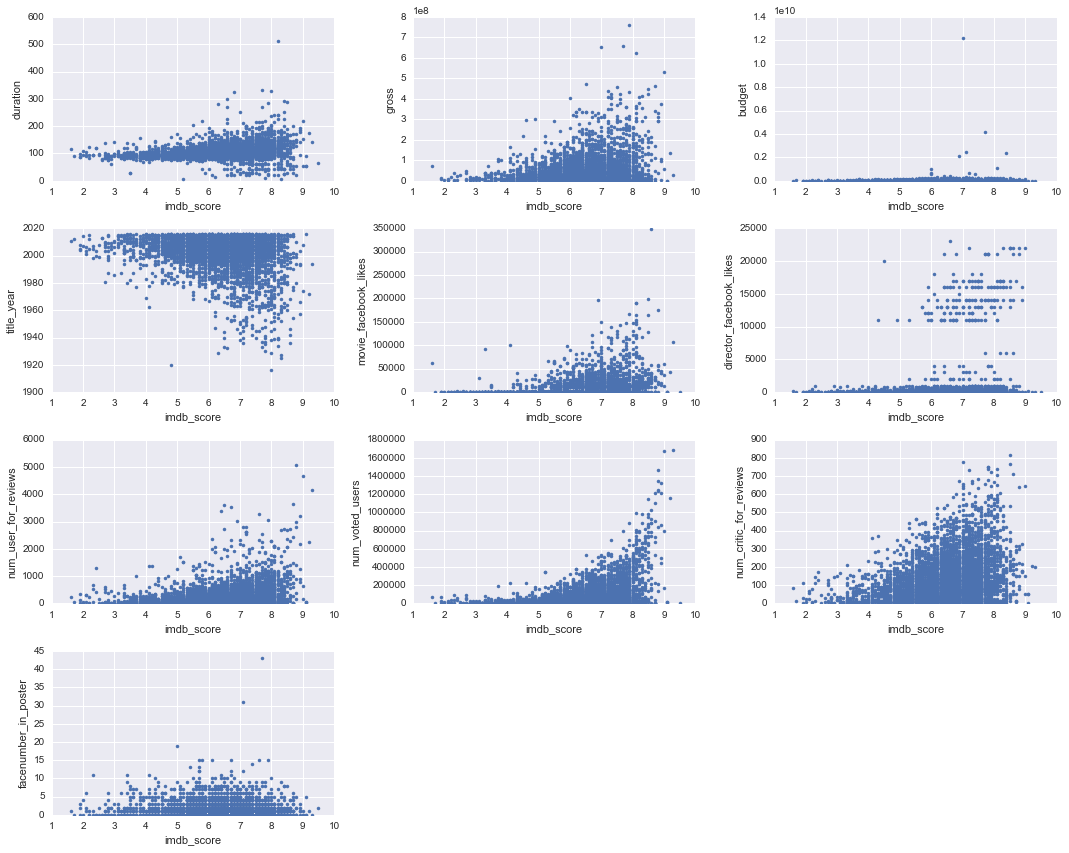

In [25]:
# Plot numeric variables against the IMDB score
fig = plt.figure(figsize=(15,12)) 

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((4,3),(0,0))
plt.plot(movies['imdb_score'], movies['duration'], '.')
plt.xlabel('imdb_score')
plt.ylabel('duration')
    
ax2 = plt.subplot2grid((4,3),(0,1))
plt.plot(movies['imdb_score'], movies['gross'], '.')
plt.xlabel('imdb_score')
plt.ylabel('gross')

ax3 = plt.subplot2grid((4,3),(0,2))
plt.plot(movies['imdb_score'], movies['budget'], '.')
plt.xlabel('imdb_score')
plt.ylabel('budget')

ax4 = plt.subplot2grid((4,3),(1,0))
plt.plot(movies['imdb_score'], movies['title_year'], '.')
plt.xlabel('imdb_score')
plt.ylabel('title_year')

ax5 = plt.subplot2grid((4,3),(1,1))
plt.plot(movies['imdb_score'], movies['movie_facebook_likes'], '.')
plt.xlabel('imdb_score')
plt.ylabel('movie_facebook_likes')

ax6 = plt.subplot2grid((4,3),(1,2))
plt.plot(movies['imdb_score'], movies['director_facebook_likes'], '.')
plt.xlabel('imdb_score')
plt.ylabel('director_facebook_likes')

ax7 = plt.subplot2grid((4,3),(2,0))
plt.plot(movies['imdb_score'], movies['num_user_for_reviews'], '.')
plt.xlabel('imdb_score')
plt.ylabel('num_user_for_reviews')

ax8 = plt.subplot2grid((4,3),(2,1))
plt.plot(movies['imdb_score'], movies['num_voted_users'], '.')
plt.xlabel('imdb_score')
plt.ylabel('num_voted_users')

ax9 = plt.subplot2grid((4,3),(2,2))
plt.plot(movies['imdb_score'], movies['num_critic_for_reviews'], '.')
plt.xlabel('imdb_score')
plt.ylabel('num_critic_for_reviews')

ax10 = plt.subplot2grid((4,3),(3,0))
plt.plot(movies['imdb_score'], movies['facenumber_in_poster'], '.')
plt.xlabel('imdb_score')
plt.ylabel('facenumber_in_poster')

plt.tight_layout()

We can see that outliers are impacting our graphs, especially for `budget`. So let's explore deeper.

There is a `describe` function as part of Pandas that can be used to generate various summary statistics (excluding NaN values).

For numeric dtypes, it will include: count, mean, std, min, max, and lower, 50, and upper percentiles.

For object dtypes (e.g. timestamps or strings), the index will include the count, unique, most common, and frequency of the most common. Timestamps also include the first and last items.

For mixed dtypes, the index will be the union of the corresponding output types. Non-applicable entries will be filled with NaN. Note that mixed-dtype outputs can only be returned from mixed-dtype inputs and appropriate use of the include/exclude arguments.

In [28]:
# Summaries: add the “include=’all’” flag to the describe fucntion to get statistics on the non-numeric column types
movies.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,4979,4895,4949.000000,4983.000000,4895.000000,4975.000000,4985,4991.000000,4.124000e+03,4998,...,4985.000000,4977.000000,4986,4993,4697,4.511000e+03,4891.000000,4985.000000,4998.000000,4998.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN
freq,4772,26,NaN,NaN,NaN,NaN,20,NaN,NaN,235,...,NaN,NaN,4662,3773,2098,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,139.890079,107.213325,688.679060,639.900905,NaN,6556.939892,4.832565e+07,NaN,...,1.368907,272.014667,NaN,NaN,NaN,3.974787e+07,2002.468820,1642.998796,6.441056,7487.430172
std,NaN,NaN,121.477586,25.248775,2821.649616,1643.298282,NaN,15061.586700,6.796483e+07,NaN,...,2.014623,377.776210,NaN,NaN,NaN,2.069689e+08,12.475235,4030.925303,1.124107,19290.726563
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,0.000000,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600000,162.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.200000,3000.000000


In examining the summary, several things catch my attention that may need further exploring.
First, I notice the minimum `title_year` is 1916. Older movies would have had significantly less of a budget and have grossed less, plus this would impact the social media variables since the movies probably would not be popular in modern times of social media popularity. 

Let's look at how many movies have a `title_year` before 1990 and also take into consideration how many movies actually have a `title_year` value.

545 of the movies have a title_year less than 1990
4891 of movies are not missing a title_year value


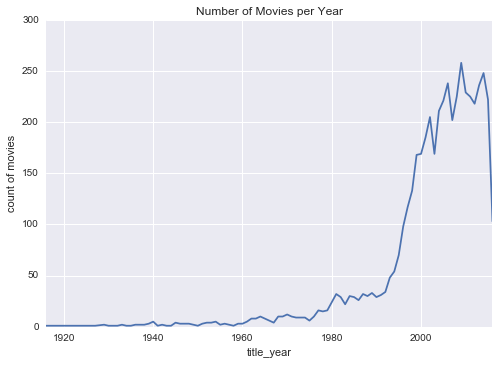

In [29]:
print str(len(movies[movies.title_year < 1990])) + " of the movies have a title_year less than 1990"
print str(movies.title_year.notnull().sum()) + " of movies are not missing a title_year value"

by_yr_plot = movies['title_year'].groupby(movies.title_year).count().plot.line(title='Number of Movies per Year')
by_yr_plot.set_xlabel("title_year")
by_yr_plot.set_ylabel("count of movies")

At this time, I'm going to leave `title_year` as is.

From the `describe()` function, we can also see the max budget is 12 billion dollars, which explains why our `budget` graph looked the way it did. This seems like a really high budget. I sorted budget in descreasing order and found that the movies with the highest budgets are made in countries outside. I looked up the top 3 on IMDB and found that the budget is in that country's currency while the gross is in US dollars. The currency was not collected in the data scraping of IMDB. 

In [97]:
print str(len(movies[movies.country != "USA"])) + " of the movies were outside the USA"

budget_explore = movies.sort_values(["budget"], ascending=(False))

budget_explore[["budget", 'movie_title', 'country']].head(5)

1225 of the movies were outside the USA


,budget,movie_title,country
2988,1.221550e+10,The Host,South Korea
3859,4.200000e+09,Lady Vengeance,South Korea
3005,2.500000e+09,Fateless,Hungary
2323,2.400000e+09,Princess Mononoke,Japan
2334,2.127520e+09,Steamboy,Japan


A little under 25% of the observations are for movies outside the USA. One solution would be to find currency data and convert `budget` for each country to dollars. Let's look at how many different countries are in our data.

In [98]:
print movies['country'].unique()
print "\n" + str(len(movies['country'].unique())) + " - number of unique countries"

movies['country'].value_counts().head(10)

['USA' 'UK' nan 'New Zealand' 'Canada' 'Australia' 'Belgium' 'Japan'
 'Germany' 'China' 'France' 'New Line' 'Mexico' 'Spain' 'Hong Kong'
 'Czech Republic' 'India' 'Soviet Union' 'South Korea' 'Peru' 'Italy'
 'Russia' 'Aruba' 'Denmark' 'Libya' 'Ireland' 'South Africa' 'Iceland'
 'Switzerland' 'Romania' 'West Germany' 'Chile' 'Netherlands' 'Hungary'
 'Panama' 'Greece' 'Sweden' 'Norway' 'Taiwan' 'Official site' 'Cambodia'
 'Thailand' 'Slovakia' 'Bulgaria' 'Iran' 'Poland' 'Georgia' 'Turkey'
 'Nigeria' 'Brazil' 'Finland' 'Bahamas' 'Argentina' 'Colombia' 'Israel'
 'Egypt' 'Kyrgyzstan' 'Indonesia' 'Pakistan' 'Slovenia' 'Afghanistan'
 'Dominican Republic' 'Cameroon' 'United Arab Emirates' 'Kenya'
 'Philippines']

66 - number of unique countries


USA          3773
UK            443
France        154
Canada        124
Germany        96
Australia      55
India          34
Spain          33
China          28
Italy          23
Name: country, dtype: int64

66 countries is a lot. I also thought about keeping the top 5 countries with the most movies, which would allow me to keep almost 92% of records. However, exchange rates have varied greatly over the years. Plus 2 of these countries are now on the Euro, which doesn't have a history spanning back through the range of years in our data. 

To keep it simple I'm going to only do analysis on movies in the USA. A little over 75% of movies are in the USA so I'll still have enough for sampling. 

# II. Data Preparation

In [99]:
# Filter for records where country is USA
movies = movies.loc[movies.country=='USA']     

# Drop 'country' column
movies.drop('country', axis=1, inplace=True)

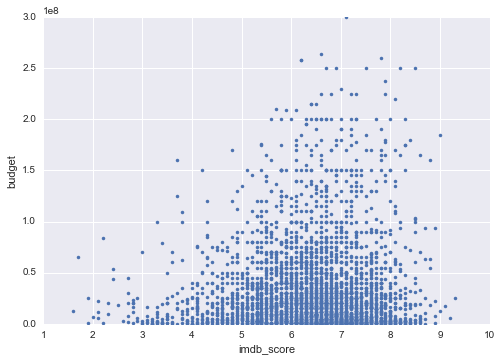

In [46]:
# Re-plot budget vs imdb_score 
plt.plot(movies['imdb_score'], movies['budget'], '.')
plt.xlabel('imdb_score')
plt.ylabel('budget')
plt.show()

#### Create New Variables
I noticed the genre variable is a string concatenating different categories so this is useless in being predictive. I'm going to break these cateogories apart and create new genre variables.

In [119]:
# Convert all values in the genre column to lowercase
movies['genres'] = movies['genres'].map(str.lower)

# Capture a list of all unique genres
genres_list = []

for genres in movies['genres'].tolist():
    new_genres = [genre for genre in genres.split('|') if genre not in genres_list]
    genres_list = genres_list + new_genres

# Add additional genre headers to dataframe (set to default value=0)
for genre in genres_list:
    movies[genre] = 0

# Add flags
for genre in genres_list:
    movies[genre] = movies.apply( lambda x: 1 if (genre in x['genres'].split('|')) else 0  , axis=1)   

# Drop 'genre' column
movies.drop('genres', axis=1, inplace=True)

KeyError: 'genres'

#### Missing Data

An important part of data analysis is exploring missing values. The performance of your model can be impacted if missing values are not treated properly. There are numerous techniques to handle missing values, such as deletion and imputation. 

Let's take a look at our data to calculate the percentage of missing values in each column.

In [100]:
def missingPct(df):
    num = df.isnull().sum()
    den = df.count()
    return 100*(num/den)

missingPct(movies)

color                         0.372439
director_name                 1.972973
num_critic_for_reviews        1.017403
duration                      0.159278
director_facebook_likes       1.972973
actor_3_facebook_likes        0.345745
actor_2_name                  0.185874
actor_1_facebook_likes        0.106129
gross                        17.612219
genres                        0.000000
actor_1_name                  0.106129
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.345745
facenumber_in_poster          0.319064
num_user_for_reviews          0.345745
language                      0.265745
content_rating                4.370678
budget                        8.481886
title_year                    1.972973
actor_2_facebook_likes        0.185874
imdb_score                    0.000000
movie_facebook_likes          0.000000
dtype: float64

Looks like our data is in pretty good shape with relatively low percentages of missing values. The highest is in the `gross` column with about 17% missing values followed by `budget` with about 8% missing. For demonstrative purposes, let's impute missing values in gross and budget with the averages in those columns. For the other columns with missing values, I'm going to just impute with zeros. 

You could take this deeper and use groupby to take the average of `gross` by `year` and apply that to a column. For example, if I want to fill `gross`, I could group the data by `year` and take the average of `gross`, then if a record is missing a gross value it will input with the average gross for that particular year.
    
    movies['gross'].fillna(movies.groupby('year')['gross'].transform('mean'), inplace=True)

The **sklearn.preprocessing** package provides several functions to help in preprocessing the data into a form that is more suitable for modeling. One example of functions available in the package is the Imputer class demonstrated below.

Imputation of missing values:
The imputer function imputes missing values either by using the mean, the median, or the most frequent value of the column in which the missing values are located.
Some Parameters:
Axis: If axis=0, then impute along columns. If axis=1, then impute along rows.
Strategy: default is mean, others available "median", "most_frequent"

In [101]:
# Replace missing budget and gross with the average
imp = Imputer(missing_values="NaN", strategy="mean", axis=0 ) #specify axis
movies["budget"]=imp.fit_transform(movies[["budget"]]).ravel()
movies["gross"]=imp.fit_transform(movies[["gross"]]).ravel()

# Replace all other missing values with 0
movies = movies.fillna(0)

# Re-Check missing percentages 
def missingPct(df):
    num = df.isnull().sum()
    den = df.count()
    return 100*(num/den)

print missingPct(movies)

color                        0.0
director_name                0.0
num_critic_for_reviews       0.0
duration                     0.0
director_facebook_likes      0.0
actor_3_facebook_likes       0.0
actor_2_name                 0.0
actor_1_facebook_likes       0.0
gross                        0.0
genres                       0.0
actor_1_name                 0.0
movie_title                  0.0
num_voted_users              0.0
cast_total_facebook_likes    0.0
actor_3_name                 0.0
facenumber_in_poster         0.0
num_user_for_reviews         0.0
language                     0.0
content_rating               0.0
budget                       0.0
title_year                   0.0
actor_2_facebook_likes       0.0
imdb_score                   0.0
movie_facebook_likes         0.0
dtype: float64


#### Convert Strings to Numeric

In most cases, models such as decision trees and random forests can handle categorical input variables, but this is not the case when using `Sklearn` in Python. `Sklearn` only handles numeric variables. `Sklearn` inclues several pre-processing tools that offer a few different methods to encode categorical data to numbers. Some methods are `OneHotEncoder`, `LabelEncoder`, and `DictVectorizor`. `Pandas` also offers something similar, `get_dummies`, which converts categorical variable into dummy/indicator variables. This is a bit easier than using `OneHotEncoder` which cannot process string values directly, so you have to convert to integers before using. 
I recommend doing some research to know which one is appropriate for your particular data. Using functions like `get_dummies` and `OneHotEncoder` can really increase the size of your dataset if your variables have a lot of categories. Also consider how these handle NaN values.

A high level overview: <br>
One-Hot: creates one column per cateogry with a 1 or 0. The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. <br>
LabelEncoder: Encode labels with value between 0 and n_classes-1. <br>
DictVectorizor: Transforms lists of feature-value mappings to vectors. <br>
Get_dummies: Convert categorical variable into dummy/indicator variables.

In [102]:
# Drop 'movie_title' because this is essentially an ID column and cannot be used for prediction
movies.drop('movie_title', axis=1, inplace=True)

from collections import defaultdict
# Using `LabelEncoder` to encode strings. This method assigns NaN values to category.
d = defaultdict(LabelEncoder)
movies = movies.apply(lambda x: d[x.name].fit_transform(x))
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,2,700,501,140,0,772,1053,714,3140,196,...,2609,0,872,5,8,355,83,792,62,671
1,2,607,300,131,318,865,1677,746,3094,751,...,1063,0,787,5,8,360,81,845,54,0
3,2,285,505,126,387,884,399,740,3132,1476,...,1346,0,863,5,8,356,86,863,68,752
5,2,80,429,96,296,509,1924,428,2374,334,...,2063,1,636,5,8,359,86,554,49,662
6,2,1536,379,120,0,868,915,737,3106,593,...,1502,0,834,5,8,357,81,851,45,0


#### Zero & Near-Zero Variance Removal

As part of my data analysis, I usually look for and consider removing:
 - Predictors that have one unique value across samples (zero variance predictors)
 - Predictors that have few unique values relative to the number of samples (near-zero variance predictors)

`VarianceThreshold()` is a feature selector that removes all low-variance features. If the threshold is not set in `VarianceThreshold()` then it will only elminate zero-variance variables. To also remove near-zero variance variables add the parameter `threshold=`

Example: To remove variables if the percentage of unique values in the sample is less than 10%: 

    VarianceThreshold(threshold=(.1))
    
In this data, I expect that movies will rarely fall into some of the created genre columns. If this is the case, then these will be poor predictors and should be removed. 

In [118]:
# Drop variables with zero, near-zero variance
def remove_feat_constants(df):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    # Let's get the zero variance features by fitting VarianceThreshold
    # selector to the data, but let's not transform the data with
    # the selector because it will also transform our Pandas data frame into
    # NumPy array and we would like to keep the Pandas data frame. Therefore,
    # let's delete the zero variance features manually.
    n_features_originally = df.shape[1]
    selector = VarianceThreshold(threshold=(.1))
    selector.fit(df)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(df.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    deleted_vars = ", ".join(list(df.columns[feat_ix_delete])) 
    # Delete zero variance feats from the original pandas data frame
    df_drop = df.drop(labels=df.columns[feat_ix_keep],
                                 axis=1)
    df = df.drop(labels=df.columns[feat_ix_delete],
                                 axis=1)
    n_features_deleted = feat_ix_delete.size
    # Print info
    if n_features_deleted >=1:
        print("Deleted %s / %s columns (~= %.1f %%)" % (
            n_features_deleted, n_features_originally,
            100.0 * (np.float(n_features_deleted) / n_features_originally)))  + \
            "\n\nZero/Near-Zero Variance variables dropped:\n" + deleted_vars + \
            "\n\nVariance of Dropped Variables: \n"
        for column in df_drop:
            print df_drop[column].value_counts()/df_drop[column].count() *100
    else:
        print("Deleted %s / %s columns (~= %.1f %%)" % (
            n_features_deleted, n_features_originally,
            100.0 * (np.float(n_features_deleted) / n_features_originally))) + \
            "\n\nNo zero/near-zero variables based on variance threshold"         
    return df

movies = remove_feat_constants(movies)        

Deleted 0 / 21 columns (~= 0.0 %)

No zero/near-zero variables based on variance threshold


#### Variable Correlation

In [105]:
# Correlation Matrix
corr = movies.corr()
corr

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,...,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
director_name,1.000000,0.046769,0.117970,0.037819,0.022664,0.023909,0.017428,-0.013138,0.026429,0.037647,...,0.009806,-0.018280,0.061736,0.014814,0.004638,0.005741,0.124982,0.013303,-0.016769,0.016638
num_critic_for_reviews,0.046769,1.000000,0.333424,0.266943,0.269531,-0.016329,0.284607,0.343825,-0.004283,0.765172,...,0.018235,-0.052379,0.724575,0.004616,0.177257,0.434110,0.317882,0.292379,0.317262,0.407969
duration,0.117970,0.333424,1.000000,0.279128,0.184151,0.036471,0.190176,0.205556,0.010203,0.379775,...,0.051541,-0.004964,0.417434,0.016293,0.088339,0.306387,0.110013,0.205348,0.296735,0.136772
director_facebook_likes,0.037819,0.266943,0.279128,1.000000,0.122140,-0.015787,0.159650,0.167260,0.042728,0.315752,...,0.027769,-0.027554,0.273879,-0.005836,0.069643,0.186025,0.021603,0.143563,0.203282,0.093922
actor_3_facebook_likes,0.022664,0.269531,0.184151,0.122140,1.000000,-0.009683,0.626550,0.219552,0.001460,0.342396,...,0.018154,0.106362,0.268361,-0.023192,0.095085,0.368314,0.148969,0.835468,0.030843,0.125253
actor_2_name,0.023909,-0.016329,0.036471,-0.015787,-0.009683,1.000000,-0.010233,0.013323,0.010904,-0.001277,...,-0.008603,0.001576,-0.000609,-0.029493,0.007508,0.024113,-0.009578,-0.028084,-0.015944,-0.008926
actor_1_facebook_likes,0.017428,0.284607,0.190176,0.159650,0.626550,-0.010233,1.000000,0.183621,-0.010827,0.376909,...,0.034736,0.071651,0.266257,-0.010918,0.158309,0.395378,0.147461,0.758796,0.064078,0.109682
gross,-0.013138,0.343825,0.205556,0.167260,0.219552,0.013323,0.183621,1.000000,0.009178,0.526390,...,0.000566,-0.017996,0.440025,-0.039707,-0.165701,0.441820,-0.077075,0.221237,0.165567,0.115837
actor_1_name,0.026429,-0.004283,0.010203,0.042728,0.001460,0.010904,-0.010827,0.009178,1.000000,0.006327,...,0.008967,-0.017915,0.020202,-0.006727,-0.003532,-0.020045,0.001039,-0.011952,-0.002786,-0.005846
num_voted_users,0.037647,0.765172,0.379775,0.315752,0.342396,-0.001277,0.376909,0.526390,0.006327,1.000000,...,0.045717,-0.049714,0.819350,0.009496,0.198123,0.528409,0.072425,0.381749,0.436893,0.269454


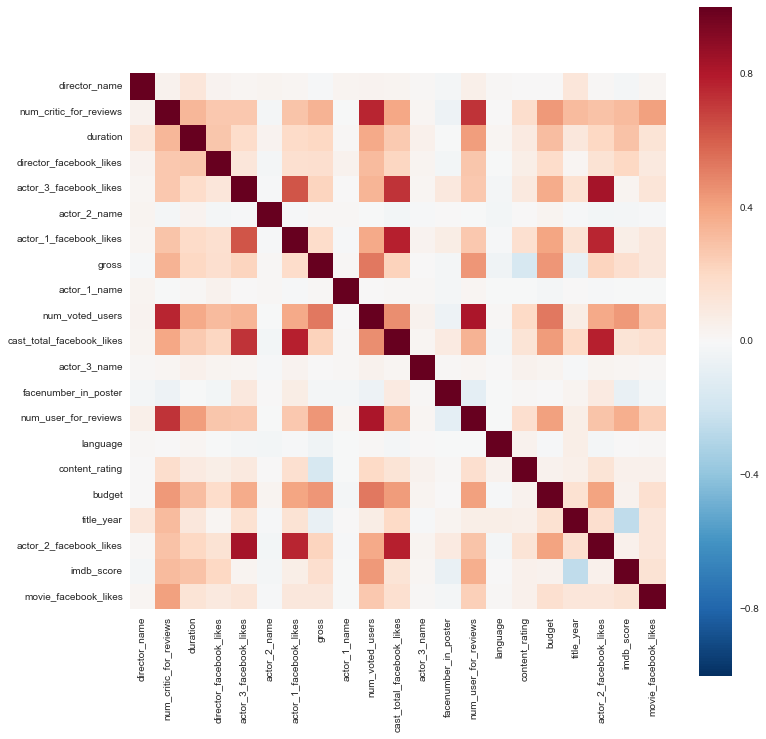

In [106]:
# Correlation matrix heat map
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#### Highly Correlated Variable Removal

The code below will identify the most correlated variables. The correlation value can be changed by updating the corr_val variable. The predictor variables correlation with the target variable is also taken. This is used to determine which variable in the correlated variable pair to drop. Currenty, the one that is lesser correlated to the target is the one that gets dropped.

In [116]:
def remove_high_corr_vars(df):
    # Remove the most correlated variables with correlation > 0.9
    n_columns_originally = len(df.columns)
    # Obtain a list of columns in the dataframe
    columns = list(df.columns.values)
    # Set correlation value
    corr_val = 0.9
    # Compute correlation of columns, methods to choose from are pearson, kendall, spearman
    # Reshape the data
    correlation = df.corr(method='pearson').abs().unstack().reset_index().rename(columns={0:'value'})
    # Sort by most correlated
    correlation.sort_values('value', ascending=False, inplace=True)
    # Filter for variables with correlation greater than the set corr_val
    high_corr = correlation[(correlation['value'] != 1.0) & (correlation['value'] > corr_val)]
    # Obtain the correlation values between each predictor and target variable
    tar_corr = correlation[correlation['level_1'] == 'imdb_score'].drop(['level_1'], axis=1).rename(columns={'level_0':'var', 'value': 'tar_corr'})

    # Merge on the target correlation values in order to compare the correlated variable pair with their target correlation.
    high_corr = pd.merge(left=high_corr, right=tar_corr, how = 'inner', left_on ='level_0', right_on='var').rename(columns={'var':'var_0', 'tar_corr':'tar_corr_0'})
    high_corr = pd.merge(left=high_corr, right=tar_corr, how = 'inner', left_on ='level_1', right_on='var').rename(columns={'var':'var_1', 'tar_corr':'tar_corr_1'})

    # Compare the correlated variables to their correlation with the target and drop the one less correlated to the target
    high_corr['var_to_drop'] = ""
    for i in range(0, len(high_corr)):
        if high_corr['tar_corr_0'].iloc[i] >= high_corr['tar_corr_1'].iloc[i]:
            high_corr['var_to_drop'].iloc[i] = high_corr['level_1'].iloc[i]
        elif high_corr['tar_corr_0'].iloc[i] < high_corr['tar_corr_1'].iloc[i]:
            high_corr['var_to_drop'].iloc[i] = high_corr['level_0'].iloc[i]

    # Create a list of column names with high correlation
    high_corr_var = list(high_corr['var_to_drop'].drop_duplicates())

    # Create a list of columns to keep by exluding those with high correlation
    cols = [col for col in df.columns if col not in high_corr_var]

    # Select only the variables in the keep list from the previous step
    df = df[cols]
    n_columns_deleted = len(high_corr_var)
    # Print info
    if n_columns_deleted >=1:
        print("Deleted %s / %s columns (~= %.1f %%)" % (
            n_columns_deleted, n_columns_originally,
            100.0 * (np.float(n_columns_deleted) / n_columns_originally))) + \
            "\n\nHighly correlated variables dropped:\n" + ", ".join(high_corr_var) 
    else:
        print("Deleted %s / %s columns (~= %.1f %%)" % (
            n_columns_deleted, n_columns_originally,
            100.0 * (np.float(n_columns_deleted) / n_columns_originally))) + \
            "\n\nNo highly correlated variables based on correlation threshold"    
    return df

# Apply function to dataframe and specify target variable
movies = remove_high_corr_vars(movies)  


Deleted 0 / 21 columns (~= 0.0 %)

No highly correlated variables based on correlation threshold


#### Set target and predictor variables

In [115]:
# Set the predictor variables and target variable
target = movies['imdb_score']
predictors = movies.drop(['imdb_score'], axis=1)

## Partition Data & Prepare for Modeling
The `train_test_split` splits data into random train and test subsets.

* **X_train** - Training Predictors 
* **y_train** - Training Target
* **X_test** - Testing Predictors
* **y_test** - Testing Target

In [110]:
# Partition modeling_df into TRAIN and TEST datasets (80% Train VS 20% Test)
seed = 2342

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=seed)

print "\n" + str(len(predictors)) + " total records split into: \n" + \
      str(len(X_train)) + " records - 80% train \n" + \
      str(len(X_test)) + " records - 20% test"


3773 total records split into: 
3018 records - 80% train 
755 records - 20% test


# III. Modeling

## Linear Regression


#### Fit the model

In [111]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(X_train, y_train)

print "\n" + str(format(lr.score(X_train, y_train) * 100, '.3f')) + "% training model accuracy"


38.218% training model accuracy


#### Model Evaluation using the Test Data

The `explained_variance_score` computes the explained variance regression score. The best possible score is 1.0, lower values are worse.

The `mean_absolute_error` function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss.

The `mean_squared_error` function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error loss or loss.

Root Mean Squared Error (RMSE) can easily be calculated by taking the square root of the `mean_squared_error`. Import `sqrt` by calling `from math import sqrt`

The `r2_score` function computes R², the coefficient of determination. It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [112]:
# Make Predictions
lr_predicted = lr.predict(X_test)

print "\nLinear Regression:\nExplained Variance Score:     " + \
    str(format(metrics.explained_variance_score(y_test, lr_predicted), '.3f')) + \
    "\nMean Absolute Error:          " + \
    str(format((1 - metrics.mean_absolute_error(y_test, lr_predicted)), '.3f')) + \
    "\nMean Squared Error:           " + \
    str(format((1 - metrics.mean_squared_error(y_test, lr_predicted)), '.3f')) + \
    "\nRMSE:                         " + \
    str(format(sqrt(metrics.mean_squared_error(y_test, lr_predicted)), '.3f')) + \
    "\nr2 Score:                     " + \
    str(format((1 - metrics.r2_score(y_test, lr_predicted)), '.3f'))


Linear Regression:
Explained Variance Score:     0.350
Mean Absolute Error:          -5.595
Mean Squared Error:           -78.103
RMSE:                         8.894
r2 Score:                     0.651


## Decision Tree
Scikit-learn has several types of Decision Trees. Do research to find the correct one for your data. Scikit-learn uses an optimised version of the CART algorithm. Sklearn documenation on [decision trees](http://scikit-learn.org/stable/modules/tree.html#regression)

#### Fit the model

In [68]:
# Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, 
# and then increase the depth. Use max_depth to control the size of the tree to prevent overfitting.
# Use min_samples_split or min_samples_leaf to control the number of samples at a leaf node. 
# A very small number will usually mean the tree will overfit, whereas a large number will 
# prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value.

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=99)
dt.fit(X_train, y_train)

print "\n" + str(format(dt.score(X_train, y_train) * 100, '.3f')) + "% training model accuracy"


62.838% training model accuracy


#### Model Evaluation using the Test Data

In [66]:
# Make Predictions
dt_predicted = dt.predict(X_test)

print "\nDecision Tree:\nExplained Variance Score:     " + \
    str(format(metrics.explained_variance_score(y_test, dt_predicted), '.3f')) + \
    "\nMean Absolute Error:          " + \
    str(format((1 - metrics.mean_absolute_error(y_test, dt_predicted)), '.3f')) + \
    "\nMean Squared Error:           " + \
    str(format((1 - metrics.mean_squared_error(y_test, dt_predicted)), '.3f')) + \
    "\nRMSE:                         " + \
    str(format(sqrt(metrics.mean_squared_error(y_test, dt_predicted)), '.3f')) + \
    "\nr2 Score:                     " + \
    str(format((1 - metrics.r2_score(y_test, dt_predicted)), '.3f'))


Decision Tree:
Explained Variance Score:     0.168
Mean Absolute Error:          -6.110
Mean Squared Error:           -100.102
r2 Score:                     0.832


## Random Forest

Sklearn documenation on available parameters/attributes of [Random Forest Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

#### Fit the model

In [113]:
rf = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 50)
rf.fit(X_train, y_train)

print "\n" + str(format(rf.score(X_train, y_train) * 100, '.3f')) + "% training model accuracy"

print "\nFeatures sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), predictors), 
             reverse=True)


49.187% training model accuracy

Features sorted by their score:
[(0.5221, 'num_voted_users'), (0.134, 'title_year'), (0.1232, 'duration'), (0.0664, 'budget'), (0.0477, 'gross'), (0.0169, 'num_critic_for_reviews'), (0.0163, 'actor_3_facebook_likes'), (0.0145, 'actor_1_facebook_likes'), (0.0135, 'num_user_for_reviews'), (0.0106, 'cast_total_facebook_likes'), (0.008, 'movie_facebook_likes'), (0.007, 'content_rating'), (0.0047, 'actor_2_facebook_likes'), (0.004, 'director_facebook_likes'), (0.0034, 'actor_2_name'), (0.0027, 'actor_3_name'), (0.0022, 'director_name'), (0.0022, 'actor_1_name'), (0.0004, 'facenumber_in_poster'), (0.0, 'language')]


#### Model Evaluation using the Test Data

In [114]:
# Make Predictions
rf_predicted = rf.predict(X_test)

print "\nRegression Forest:\nExplained Variance Score:     " + \
    str(format(metrics.explained_variance_score(y_test, rf_predicted), '.3f')) + \
    "\nMean Absolute Error:          " + \
    str(format((1 - metrics.mean_absolute_error(y_test, rf_predicted)), '.3f')) + \
    "\nMean Squared Error:           " + \
    str(format((1 - metrics.mean_squared_error(y_test, rf_predicted)), '.3f')) + \
    "\nRMSE:                         " + \
    str(format(sqrt(metrics.mean_squared_error(y_test, rf_predicted)), '.3f')) + \
    "\nr2 Score:                     " + \
    str(format((1 - metrics.r2_score(y_test, rf_predicted)), '.3f'))


Regression Forest:
Explained Variance Score:     0.393
Mean Absolute Error:          -5.370
Mean Squared Error:           -72.748
RMSE:                         8.588
r2 Score:                     0.607


## Model Performance Comparision

In [74]:
print "Linear Regression: \n   Accuracy Score:  " + \
      str(format(metrics.accuracy_score(y_test, lr_predicted), '.3f')) + \
      "\n   Error Rate:      " + \
      str(format((1 - metrics.accuracy_score(y_test, lr_predicted)), '.3f')) +\
      "\n\nDecision Tree: \n   Accuracy Score:  " + \
      str(format(metrics.accuracy_score(y_test, dt_predicted), '.3f')) + \
      "\n   Error Rate:      " + \
      str(format((1 - metrics.accuracy_score(y_test, dt_predicted)), '.3f')) + \
      "\n\nRandom Forest: \n   Accuracy Score:  " + \
      str(format(metrics.accuracy_score(y_test, rf_predicted), '.3f')) + \
      "\n   Error Rate:      " + \
      str(format((1 - metrics.accuracy_score(y_test, rf_predicted)), '.3f')) + \
      "\n\nSVM: \n   Accuracy Score:  " + \
      str(format(metrics.accuracy_score(y_test, svm_predicted), '.3f')) + \
      "\n   Error Rate:      " + \
      str(format((1 - metrics.accuracy_score(y_test, svm_predicted)), '.3f'))  

ValueError: Can't handle mix of multiclass and continuous